# Recommend For New Users

## 1. Simple Filter & Sort

    -- Choose genre and recommend movies according to the rating.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read movies data
movies = pd.read_csv('Project91/ml-20m/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.shape

(27278, 3)

In [4]:
len(set(movies.movieId))

27278

### 1.1 Recommend according to ratings

In [5]:
ratings = pd.read_csv('Project91/ml-20m/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
len(set(ratings.movieId))

26744

In [7]:
mean = pd.DataFrame(ratings[['movieId','rating']].groupby(['movieId'])['rating'].mean())
mean['movieId'] = mean.index
mean.index = range(len(mean))

In [8]:
mean.head()

,rating,movieId
0,3.921240,1
1,3.211977,2
2,3.151040,3
3,2.861393,4
4,3.064592,5


In [9]:
merged_table = pd.merge(movies, mean, on = 'movieId')

In [10]:
merged_table.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


In [11]:
merged_table.shape

(26744, 4)

In [12]:
# if choose Adventure
inpt = 'Adventure'
result = merged_table.sort_values('rating', ascending = False)
result[result.genres.str.contains(inpt)].title[:10].tolist()

['Giorgino (1994)',
 'Life On A String (Bian chang Bian Zou) (1991)',
 'Victor and the Secret of Crocodile Mansion (2012)',
 'Into the Middle of Nowhere (2010)',
 'Stargate SG-1 Children of the Gods - Final Cut (2009)',
 'The Beautiful Story (1992)',
 'Curse of the Ring (Ring of the Nibelungs) (2004)',
 'The Magnificent Gladiator (1964)',
 'Symphony of the Soil (2012)',
 'Itinerary of a Spoiled Child (1988)']

### 1.2 Take the number of ratings for a single film into account

In [13]:
count = pd.DataFrame(ratings[['movieId','userId']].groupby(['movieId'])['userId'].count())
count['movieId'] = count.index
count.index = range(len(count))

In [14]:
count.columns = ['count','movieId']
count = count.sort_values('count', ascending = False)
count.head()

,count,movieId
293,67310,296
352,66172,356
315,63366,318
587,63299,593
476,59715,480


In [15]:
count.describe()

,count,movieId
count,26744.000000,26744.000000
mean,747.841123,58789.612436
std,3085.818268,44159.344871
min,1.000000,1.000000
25%,3.000000,6795.750000
50%,18.000000,65880.000000
75%,205.000000,99110.500000
max,67310.000000,131262.000000


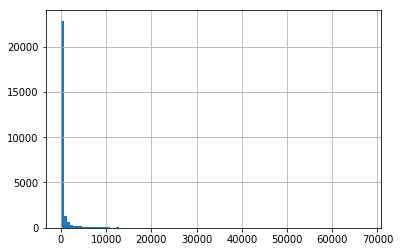

In [33]:
import matplotlib.pyplot as plt
count['count'].hist(bins=100)
plt.show()

In [17]:
len(count[count['count'] < 5])

8399

In [18]:
merged = pd.merge(merged_table, count, on = 'movieId')
merged.head()

,movieId,title,genres,rating,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,49695
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,22243
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,12735
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,2756
4,5,Father of the Bride Part II (1995),Comedy,3.064592,12161


In [19]:
# rating > 4 and sorted in number of ratings
inpt = 'Adventure'
result = merged.sort_values('count', ascending = False)
result[result.genres.str.contains(inpt) & (result.rating > 4)].head()#.title[:10].tolist()

,movieId,title,genres,rating,count
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.190672,54502
1184,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,4.004622,46839
1171,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,4.188202,45313
1173,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,4.219009,43295
4897,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,4.137925,37553


In [20]:
# the number of ratings > 10 and sorted in rating
inpt = 'Adventure'
result = merged.sort_values('rating', ascending = False)
result[result.genres.str.contains(inpt) & (result['count'] > 10)].head()#.title[:10].tolist()

,movieId,title,genres,rating,count
1935,2019,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama,4.274180,11611
9319,27423,"O Auto da Compadecida (Dog's Will, A) (2000)",Adventure|Comedy,4.269231,13
5917,6016,City of God (Cidade de Deus) (2002),Action|Adventure|Crime|Drama|Thriller,4.235410,12937
891,908,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller,4.233538,15627
1173,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,4.219009,43295


## 2. Content-Based Recommendation

    -- Recommend for a typical movie

In [21]:
genome_scores = pd.read_csv('Project91/ml-20m/genome-scores.csv')
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [22]:
genome_scores.shape

(11709768, 3)

In [23]:
len(set(genome_scores.movieId))

10381

In [24]:
max(genome_scores.tagId)

1128

In [25]:
# transform the genome_scores dataframe into relevance matrix
df = genome_scores.groupby(['movieId'])['relevance'].apply(list).apply(pd.Series)
score_matrix = np.matrix(df)

In [26]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02500,0.02500,0.05775,0.09675,0.14675,0.21700,0.06700,0.26275,0.26200,0.03200,...,0.03950,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300
2,0.03975,0.04375,0.03775,0.04800,0.11025,0.07250,0.04775,0.10975,0.09925,0.02050,...,0.04175,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875
3,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
4,0.03725,0.03950,0.03675,0.03100,0.06825,0.04050,0.02325,0.08700,0.05125,0.03025,...,0.05750,0.03375,0.02275,0.03975,0.18525,0.05925,0.01500,0.01525,0.06450,0.01300
5,0.04200,0.05275,0.05925,0.03675,0.07525,0.12525,0.02850,0.08500,0.02950,0.02875,...,0.04250,0.02825,0.02150,0.02600,0.14275,0.02075,0.01650,0.01675,0.10750,0.01825


In [27]:
df.shape

(10381, 1128)

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

# compute cosine similarity for every movie 
cosine_sim = cosine_similarity(score_matrix, score_matrix)

In [29]:
# get the movieId value and reset the df index
df['movieId']=df.index
df.index = range(len(df))

In [30]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,movieId
0,0.02500,0.02500,0.05775,0.09675,0.14675,0.21700,0.06700,0.26275,0.26200,0.03200,...,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300,1
1,0.03975,0.04375,0.03775,0.04800,0.11025,0.07250,0.04775,0.10975,0.09925,0.02050,...,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875,2
2,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850,3
3,0.03725,0.03950,0.03675,0.03100,0.06825,0.04050,0.02325,0.08700,0.05125,0.03025,...,0.03375,0.02275,0.03975,0.18525,0.05925,0.01500,0.01525,0.06450,0.01300,4
4,0.04200,0.05275,0.05925,0.03675,0.07525,0.12525,0.02850,0.08500,0.02950,0.02875,...,0.02825,0.02150,0.02600,0.14275,0.02075,0.01650,0.01675,0.10750,0.01825,5


In [31]:
def recommendation(title):
    
    # link title to movieId and find the row number of the matrix
    ids = movies[movies['title'] == title]['movieId'].values[0]
    i = df[df.movieId==ids].index.values[0]
    
    # find the specific score for the movie and sort the scores
    sim_scores = list(enumerate(cosine_sim[i]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # store the row numbers and related movieId
    indices = [i[0] for i in sim_scores[1:]]
    movie_ids = df.iloc[indices,:].movieId.values
    
    result = []
    for i in movie_ids:
        result.append(movies[movies.movieId == i].title.values[0])
    
    return result

In [32]:
# recommend 10 movies
recommendation('Toy Story (1995)')[:10]

['Monsters, Inc. (2001)',
 'Toy Story 2 (1999)',
 "Bug's Life, A (1998)",
 'Finding Nemo (2003)',
 'Toy Story 3 (2010)',
 'Ratatouille (2007)',
 'Ice Age (2002)',
 'Shrek (2001)',
 'Up (2009)',
 'Antz (1998)']